<a href="https://colab.research.google.com/github/arifanwar02431/Materi/blob/main/Praktik_AI/Kontrol_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulasi Kontro PID

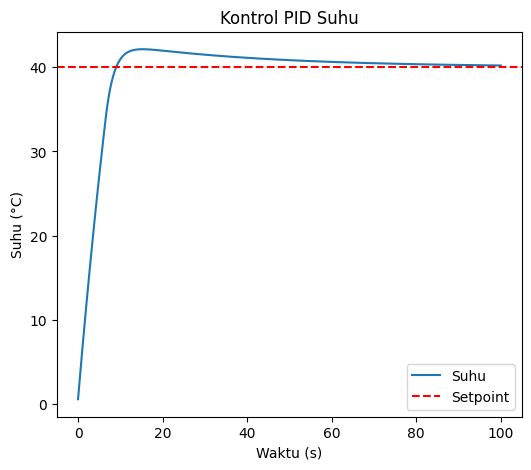

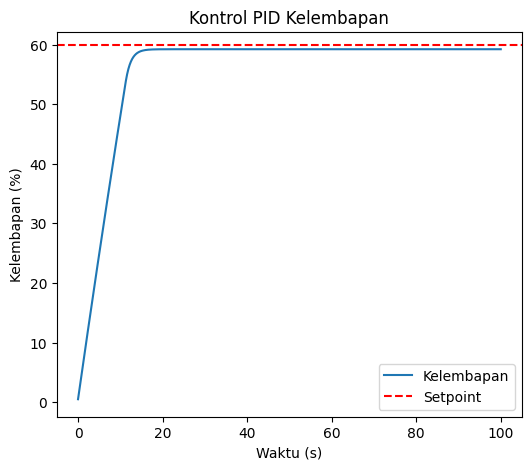

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Setpoint
setpoint_temp = 40  # derajat Celcius
setpoint_humidity = 60  # persen

# PID parameters
Kp, Ki, Kd = 1., .03, .2  # Parameter PID untuk suhu #2.0, 0.1, 0.05
Kp_h, Ki_h, Kd_h = 1.5, .0, .0  # Parameter PID untuk kelembapan

# Simulasi
n = 1000  # jumlah iterasi
time = np.linspace(0, 100, n)  # waktu simulasi

temp = 0  # Suhu awal
humidity = 0  # Kelembapan awal

temp_list = []
humidity_list = []
control_temp_list = []
control_humidity_list = []

# Variabel untuk PID manual
integral_temp = 0
prev_error_temp = 0
integral_humidity = 0
prev_error_humidity = 0

dt = time[1] - time[0]  # Selisih waktu antar iterasi

for t in time:
    # Hitung error
    error_temp = setpoint_temp - temp
    error_humidity = setpoint_humidity - humidity

    # Hitung integral dan derivatif
    integral_temp += error_temp * dt
    derivative_temp = (error_temp - prev_error_temp) / dt if dt > 0 else 0
    integral_humidity += error_humidity * dt
    derivative_humidity = (error_humidity - prev_error_humidity) / dt if dt > 0 else 0

    # Hitung kontrol PID dengan batas maksimum/minimum
    control_temp = np.clip(Kp * error_temp + Ki * integral_temp + Kd * derivative_temp, -10, 10)
    control_humidity = np.clip(Kp_h * error_humidity + Ki_h * integral_humidity + Kd_h * derivative_humidity, -10, 10)

    # Model sistem dengan dinamika lebih realistis
    temp += (control_temp - 0.1 * (temp - 20)) * 0.05  # Model respons suhu lebih lambat
    humidity += (control_humidity - 0.02 * humidity) * 0.05  # Model respons kelembapan lebih realistis

    # Simpan data untuk plot
    temp_list.append(temp)
    humidity_list.append(humidity)
    control_temp_list.append(control_temp)
    control_humidity_list.append(control_humidity)

    # Simpan error sebelumnya
    prev_error_temp = error_temp
    prev_error_humidity = error_humidity

# Plot hasil simulasi
plt.figure(figsize=(6, 5))
plt.plot(time, temp_list, label='Suhu')
plt.axhline(setpoint_temp, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Waktu (s)')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.title('Kontrol PID Suhu')
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(time, humidity_list, label='Kelembapan')
plt.axhline(setpoint_humidity, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Waktu (s)')
plt.ylabel('Kelembapan (%)')
plt.legend()
plt.title('Kontrol PID Kelembapan')
plt.show()


In [29]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 24.7 MB/s eta 0:00:00


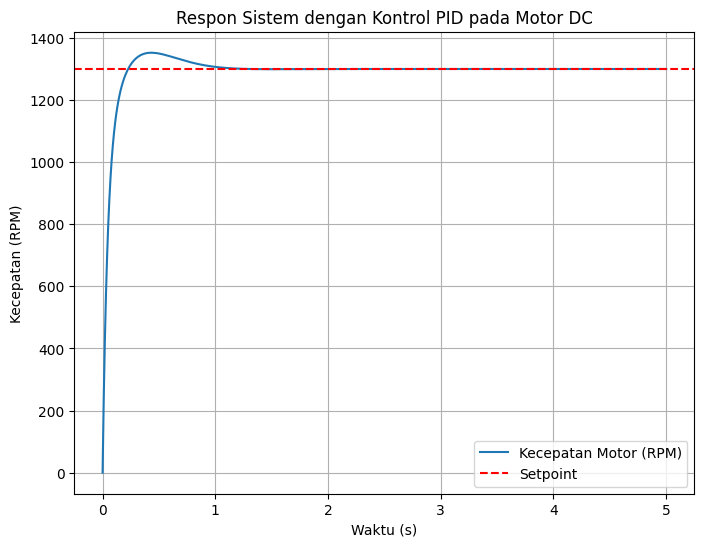

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parameter motor DC berdasarkan literatur
J = 0.01  # Momen inersia rotor (kg·m²)
b = 0.1   # Koefisien redaman viskos (N·m·s)
K = 0.01  # Konstanta gaya elektromotif balik (V·s/rad)
R = 1     # Resistansi armatur (Ω)
L = 0.5   # Induktansi armatur (H)

# Fungsi transfer motor DC: G(s) = K / [(Js + b)(Ls + R) + K^2]
num = [K]
den = [J*L, J*R + L*b, R*b + K**2]
motor_tf = ctrl.TransferFunction(num, den)

# Parameter PID
Kp = 100.0
Ki = 300.0
Kd = 10.0

# Fungsi transfer PID: C(s) = Kd*s^2 + Kp*s + Ki / s
pid_tf = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Sistem loop tertutup
closed_loop_tf = ctrl.feedback(pid_tf * motor_tf)

# Simulasi
T = np.linspace(0, 5, 500)  # Waktu simulasi
setpoint_speed = 1300  # Setpoint kecepatan (RPM)
T, yout = ctrl.step_response(closed_loop_tf * setpoint_speed, T)

# Plot hasil simulasi
plt.figure(figsize=(8, 6))
plt.plot(T, yout, label='Kecepatan Motor (RPM)')
plt.axhline(setpoint_speed, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan (RPM)')
plt.legend()
plt.title('Respon Sistem dengan Kontrol PID pada Motor DC')
plt.grid()
plt.show()
